<a href="https://colab.research.google.com/github/dhevintaaa/Repository_Project/blob/main/Titanic%20Prediction%20using%20Random%20Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description

**Overview**

The data has been split into two groups:

* training set (train.csv)
* test set (test.csv)

Source: https://www.kaggle.com/competitions/titanic/data


**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.


## **Variable**

* survival: Survival (0 = No, 1 = Yes)
* pclass: Ticket Class (1 = 1st, 2 = 2nd, 3= 3rd)
* sex: Sex
* Age: Age in years
* sibsp: # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* fare: Passenger fare
* cabin: Cabin number
* embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**Variable Notes**

**pclass:** A proxy for socio-economic status (SES)

* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...

* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.


# Import Packages & Data

In [142]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [143]:
os.listdir()

['.config', 'drive', 'submission.csv', 'sample_data']

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/test.csv')

# Data Train

In [146]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [148]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [149]:
#Target: Survival
train['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [150]:
#Check duplicate
train.duplicated().sum()

np.int64(0)

In [151]:
#Check missing value
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [152]:
#Count Sex
train['Sex'].value_counts()

,count
Sex,
male,577
female,314


Filling the missing value "Age" with the mean of each sex

In [153]:
#Convert the "Sex" column: 0 = Male and 1 = Female
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

In [154]:
#Calculate the mean age for each sex
mean_age_male = train[train['Sex'] == 0]['Age'].mean()
mean_age_female = train[train['Sex'] == 1]['Age'].mean()

In [155]:
#Filling the missing value "Age" column with the mean of each sex
train.loc[(train['Sex'] == 0) & (train['Age'].isnull()), 'Age'] = mean_age_male
train.loc[(train['Sex'] == 1) & (train['Age'].isnull()), 'Age'] = mean_age_female

In [156]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [157]:
#Convert the "Embarked" column: 0 = S, 1 = C, 2 = Q, nan
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2, np.nan: np.nan})

In [158]:
#Delete the missing value foc the "Embarked" column
train = train.dropna(subset=['Embarked'])

In [159]:
#Drop the unnecessary columns: "Name", "Ticket", and "Cabin" from train
train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [160]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [161]:
#Doing feature scalling using min-max scaling for "Age" and "Fare" columns to
#scale independent features to a range of 0 to 1

train['Age'] = (train['Age'] - train['Age'].min()) / (train['Age'].max() - train['Age'].min())
train['Fare'] = (train['Fare'] - train['Fare'].min()) / (train['Fare'].max() - train['Fare'].min())

In [162]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,0.367812,0.524184,0.382452,0.062649,0.362205
std,256.998173,0.486260,0.834700,0.477538,0.163124,1.103705,0.806761,0.097003,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.371701,0.000000,0.000000,0.028213,0.000000
75%,668.000000,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508,1.000000
max,891.000000,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000,2.000000


In [163]:
#Splitting the data for feature and label

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train.drop(['Survived'], axis=1),   # Features
    train.Survived,                     # Target/label
    test_size=0.2,                      # 20% of data will be used for testing
    random_state=0,                     # Ensures reproducible splits
    stratify=train.Survived             # Keep the same proportion of classes in train & test
)

In [164]:
#Model Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Build RF with default parameter
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.848314606741573
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       110
           1       0.82      0.78      0.80        68

    accuracy                           0.85       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



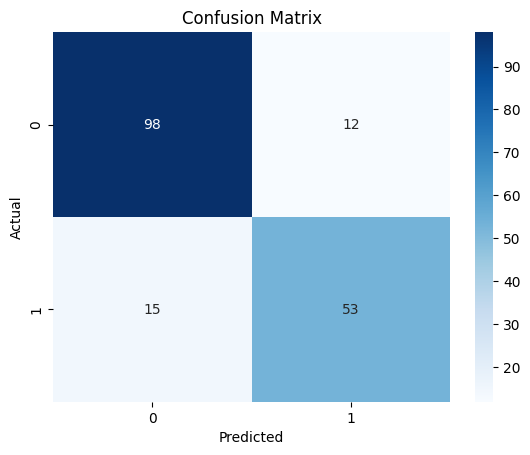

In [165]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Data Test

In [166]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [167]:
#Drop the unnecessary columns: "Name", "Ticket", and "Cabin" from test
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [168]:
#Check duplicate values
test.duplicated().sum()

np.int64(0)

In [169]:
#Check missing values
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [170]:
#Convert the "Sex" column: 0 = Male and 1 = Female
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

In [171]:
test['Sex'].value_counts()

,count
Sex,
0,266
1,152


In [172]:
#Calculate the mean age for each sex
mean_age_male = test[test['Sex'] == 0]['Age'].mean()
mean_age_female = test[test['Sex'] == 1]['Age'].mean()

In [173]:
#Filling the missing value "Age" column with the mean of each sex
test.loc[(test['Sex'] == 0) & (test['Age'].isnull()), 'Age'] = mean_age_male
test.loc[(test['Sex'] == 1) & (test['Age'].isnull()), 'Age'] = mean_age_female

In [174]:
#Convert the "Embarked" column: 0 = S, 1 = C, 2 = Q, nan
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2, np.nan: np.nan})

In [175]:
#Delete the missing value foc the "Fare" column
test = test.dropna(subset=['Fare'])

In [176]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [177]:
#Doing feature scalling using min-max scaling for "Age" and "Fare" columns to
#scale independent features to a range of 0 to 1

test['Age'] = (test['Age'] - test['Age'].min()) / (train['Age'].max() - train['Age'].min())
test['Fare'] = (train['Fare'] - train['Fare'].min()) / (train['Fare'].max() - train['Fare'].min())

In [178]:
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,416.000000,417.000000
mean,1100.635492,2.263789,0.364508,30.030110,0.448441,0.393285,0.063370,0.465228
std,120.923774,0.842077,0.481870,12.562386,0.897568,0.982419,0.096378,0.685961
min,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.000000,1.000000,0.000000,22.830000,0.000000,0.000000,0.015469,0.000000
50%,1101.000000,3.000000,0.000000,30.102362,0.000000,0.000000,0.028213,0.000000
75%,1205.000000,3.000000,1.000000,34.830000,1.000000,0.000000,0.060063,1.000000
max,1309.000000,3.000000,1.000000,75.830000,8.000000,9.000000,1.000000,2.000000


In [179]:
#Prediction using RF model
prediction = rf.predict(test)

In [180]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [181]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})

submission.to_csv('submission.csv', index=False)

In [182]:
prediction_df = pd.read_csv('submission.csv')

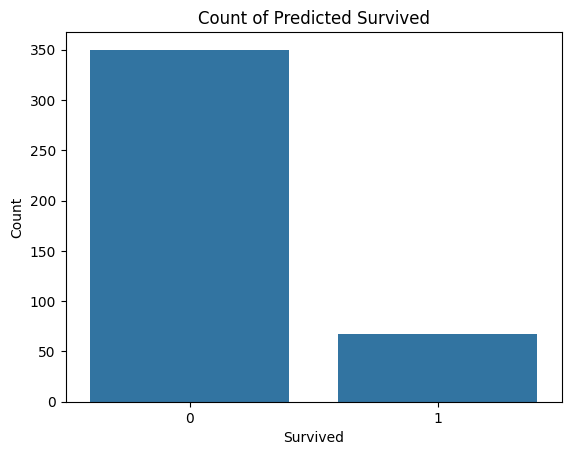

In [183]:
#Visualizing predicted values
sns.countplot(x='Survived', data=prediction_df)

plt.title("Count of Predicted Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()